In [2]:
import os #for file io
import gzip #for dataset
import keras #creating and manipulating nerula network model 
#load_model to load previous models
#Sequential layer model
#Dense layers
#for visualize TensorBoard
#backend for confgration when loading dataset 

import matplotlib.pyplot as plt #visualization
import numpy as np #numerical calculations
import random #to generate random number 
import struct 
import time 

In [3]:
#conf for notebook
%matplotlib inline 
#it initialize images in jupyter notebook itself
random.seed(12345)

image_dir = 'C:/gzip' #main location of the emnist dataset
labels = '0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz' #labels stored as numbers its for this
categories = len(labels)

batch_size = 1024 #how many images you are going to put to nn in once
epochs = 5 #an iteration over the entire data

model_path = 'C:/Users/Kan/Desktop/emnist-cnn-model-epoch5.h5' #path of the model

In [4]:
#read data from disk

def read_idx(filename):
    print('Processing data from %s.' % filename)
    with gzip.open(filename, 'rb') as f:
        #read the magic number first
        z, dtype, dim = struct.unpack('>HBB', f.read(4))
        print('Dimensions:', dim)
        #get the shape of the data
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dim))
        print('Shape:', shape)
        #return the data as a reshaped numpy array
        return np.frombuffer(f.read(), dtype=np.uint8).reshape(shape)

def load_emnist():
    train_images = os.path.join(image_dir, 'emnist-byclass-train-images-idx3-ubyte.gz')
    train_labels = os.path.join(image_dir, 'emnist-byclass-train-labels-idx1-ubyte.gz')

    #calls unzip function
    train_X = read_idx(train_images) 
    train_y = read_idx(train_labels)
    
    return (train_X, train_y)

#calls load function
raw_train_X, raw_train_y = load_emnist()

Processing data from C:/gzip\emnist-byclass-train-images-idx3-ubyte.gz.
Dimensions: 3
Shape: (697932, 28, 28)
Processing data from C:/gzip\emnist-byclass-train-labels-idx1-ubyte.gz.
Dimensions: 1
Shape: (697932,)


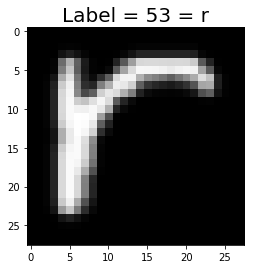

In [5]:
#display random image

i = random.randint(0, raw_train_X.shape[0])#generate random number between 0 - 697932
fig, ax = plt.subplots()
ax.clear()
ax.imshow(raw_train_X[i].T, cmap='gray') #all data is flipped over, so we use T for transpose

title = 'Label = %d = %s' % (raw_train_y[i], labels[raw_train_y[i]])
ax.set_title(title, fontsize=20)

plt.show()

In [6]:
#data comes as integer we want them as float so we can seperates  
train_X = raw_train_X.astype('float32')

#image values are between 0 to 255 
#but we want them between 0 to 1 because most ml models uses 0-1
train_X /= 255

In [7]:
#sequantial model wants dataset to be flat so we reahape 
train_X = train_X.reshape(train_X.shape[0], 28, 28, 1)

In [8]:
#one hot encode the output data
train_y = keras.utils.np_utils.to_categorical(raw_train_y)
print(raw_train_y[5])
print(train_y[5])

38
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [9]:
#model
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32,
                kernel_size=(5, 5),
                strides=(2, 2),
                input_shape=(28, 28, 1),
                activation='relu'))
model.add(keras.layers.Conv2D(64,
                kernel_size=(3, 3),
                activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Dense(categories, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [10]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
#train
t1 = time.time()
fit = model.fit(train_X, train_y, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.1) 
#use %10 of the train data as validation data
t2 = time.time()
print('Elapsed time: %ds' % (t2 - t1))

Instructions for updating:
Use tf.cast instead.
Train on 628138 samples, validate on 69794 samples
Epoch 1/5
628138/628138 [==============================] - 219s 349us/step - loss: 0.8958 - acc: 0.7355 - val_loss: 0.4642 - val_acc: 0.8386
Epoch 2/5
628138/628138 [==============================] - 211s 336us/step - loss: 0.5168 - acc: 0.8237 - val_loss: 0.4171 - val_acc: 0.8501
Epoch 3/5
628138/628138 [==============================] - 190s 302us/step - loss: 0.4701 - acc: 0.8363 - val_loss: 0.3981 - val_acc: 0.8554
Epoch 4/5
628138/628138 [==============================] - 185s 295us/step - loss: 0.4472 - acc: 0.8427 - val_loss: 0.3869 - val_acc: 0.8596
Epoch 5/5
628138/628138 [==============================] - 181s 289us/step - loss: 0.4318 - acc: 0.8469 - val_loss: 0.3815 - val_acc: 0.8592
Elapsed time: 987s


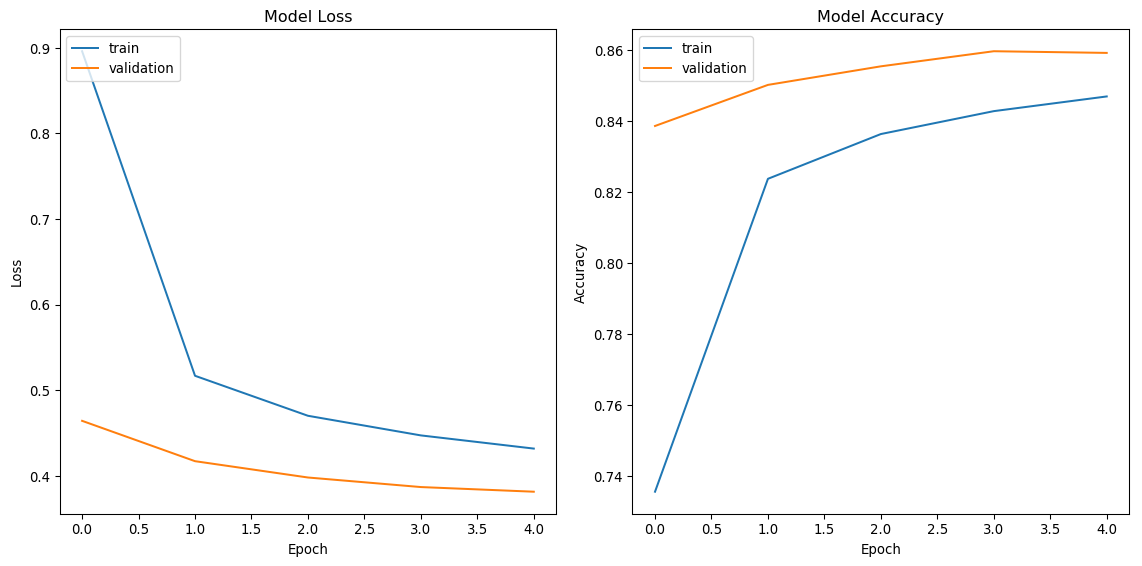

In [15]:
plt.figure(figsize=(12, 6), dpi=96)


plt.subplot(1, 2, 1)
plt.plot(fit.history['loss'])
plt.plot(fit.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train','validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(fit.history['acc'])
plt.plot(fit.history['val_acc'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train','validation'], loc='upper left')


plt.tight_layout()
plt.show()

In [13]:
#save model
model.save(model_path)